In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("/content/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
gen=pd.get_dummies(dataset.Gender,drop_first=True)
dataset1=pd.concat([dataset['Age'],dataset['EstimatedSalary'],gen,dataset['Purchased']],axis=1)
dataset1


,Age,EstimatedSalary,Male,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


In [7]:
X=dataset1.iloc[:,:-1].values
y=dataset1.iloc[:,3].values


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
len(X_test)

80

In [17]:
from sklearn.naive_bayes import GaussianNB
cf=GaussianNB()
cf.fit(X_train, y_train)
pred=cf.predict(X_test)

In [18]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,pred))

0.925


In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[56,  2],
       [ 4, 18]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [23]:
cf.predict_proba(X_test)

array([[0.90405278, 0.09594722],
       [0.82749095, 0.17250905],
       [0.86680505, 0.13319495],
       [0.9132547 , 0.0867453 ],
       [0.88993578, 0.11006422],
       [0.9602245 , 0.0397755 ],
       [0.89710526, 0.10289474],
       [0.03998682, 0.96001318],
       [0.98861264, 0.01138736],
       [0.52447392, 0.47552608],
       [0.95833106, 0.04166894],
       [0.961127  , 0.038873  ],
       [0.87306299, 0.12693701],
       [0.7516744 , 0.2483256 ],
       [0.97797956, 0.02202044],
       [0.45972547, 0.54027453],
       [0.81180367, 0.18819633],
       [0.98159016, 0.01840984],
       [0.00361394, 0.99638606],
       [0.8744969 , 0.1255031 ],
       [0.89031399, 0.10968601],
       [0.0044139 , 0.9955861 ],
       [0.73572944, 0.26427056],
       [0.14413636, 0.85586364],
       [0.97780721, 0.02219279],
       [0.00411598, 0.99588402],
       [0.91270298, 0.08729702],
       [0.93647716, 0.06352284],
       [0.83563915, 0.16436085],
       [0.85176132, 0.14823868],
       [0.

In [27]:
y_predictProb = cf.predict_proba(X_test)
from sklearn.metrics import auc, roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_predictProb[::,1])
roc_auc=auc(fpr,tpr)
roc_auc

0.9827586206896552

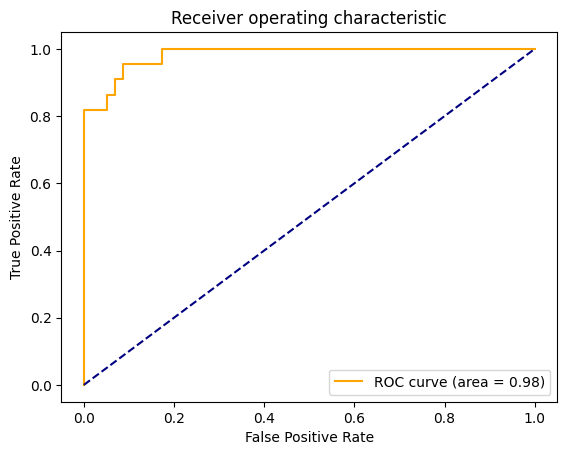

In [32]:
plt.plot(fpr,tpr,color='orange',label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1], [0,1],color='navy',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

Multinomial Naive Bayes

In [34]:
from sklearn.datasets import load_iris
iris_data=load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
iris=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris['Species']=pd.Series(iris_data.target)
iris['Names']=iris['Species'].apply(lambda x: iris_data.target_names[x])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [39]:
iris['Names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Names, dtype: int64

In [41]:
X=iris.drop(['Species','Names'],axis=1)
y=iris['Species']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [46]:
from sklearn.naive_bayes import GaussianNB
cf2=GaussianNB()
cf2.fit(X_train,y_train)
y_pred=cf2.predict(X_test)

In [47]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [48]:
cf2.score(X_test,y_test)

1.0

In [49]:
cf2.predict_proba(X_test)

array([[2.05841140e-233, 1.23816844e-006, 9.99998762e-001],
       [1.76139943e-084, 9.99998414e-001, 1.58647449e-006],
       [1.00000000e+000, 1.48308613e-018, 1.73234612e-027],
       [6.96767669e-312, 5.33743814e-007, 9.99999466e-001],
       [1.00000000e+000, 9.33944060e-017, 1.22124682e-026],
       [4.94065646e-324, 6.57075840e-011, 1.00000000e+000],
       [1.00000000e+000, 1.05531886e-016, 1.55777574e-026],
       [2.45560284e-149, 7.80950359e-001, 2.19049641e-001],
       [4.01160627e-153, 9.10103555e-001, 8.98964447e-002],
       [1.46667004e-094, 9.99887821e-001, 1.12179234e-004],
       [5.29999917e-215, 4.59787449e-001, 5.40212551e-001],
       [4.93479766e-134, 9.46482991e-001, 5.35170089e-002],
       [5.23735688e-135, 9.98906155e-001, 1.09384481e-003],
       [4.97057521e-142, 9.50340361e-001, 4.96596389e-002],
       [9.11315109e-143, 9.87982897e-001, 1.20171030e-002],
       [1.00000000e+000, 7.81797826e-019, 1.29694954e-028],
       [3.86310964e-133, 9.87665084e-001

In [57]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred)
cm2

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

<Axes: >

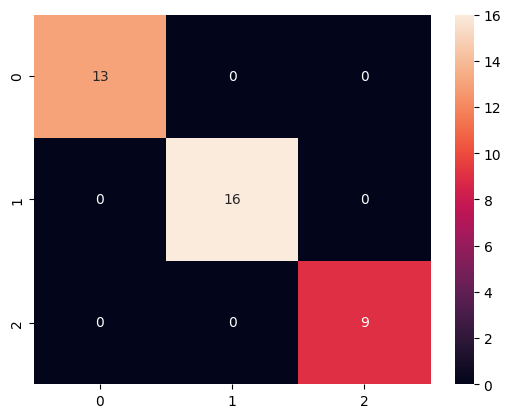

In [63]:
sns.heatmap(cm2,annot=True)